# PES University, Bangalore
UE21CS342AA2 - Data Analytics - Worksheet 4a

Designed by Pranamya Bhat, Sree Nidhi, Dept. of CSE

pranamyabhat207@gmail.com, sreenidhi8765@gmail.com

## Name: NAGAVENI L G
## SRN: PES2UG21CS315

### Collaborative filtering
The **Collaborative filtering method** for recommender systems is a method that helps in new recommendations based on the past interactions that have been recorded between users and items.

### Task
The dataset contains a set of 129 restaurants, with each of them serving a unique cuisine in their own style.
In this notebook, we will be exploring and analysing the ratings given by customers to each of these restaurants.




### Dataset Details

**place_id**: A unique 6-digit code given to each restaurant.

**name**: Name of the restaurant.

**user_id**: A unique 4-digit id given to each customer.

**rating**: Ratings given by the customer to the restaurant, with values [0,1,2].

**price**: Affordability of the restaurant, with values [high, medium, low]

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

from sklearn.metrics.pairwise import cosine_similarity

In [4]:
ratings=pd.read_csv("ratings.csv")
ratings.shape

(1157, 19)

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1157 non-null   int64  
 1   placeID         1157 non-null   int64  
 2   latitude        1157 non-null   float64
 3   longitude       1157 non-null   float64
 4   the_geom_meter  1157 non-null   object 
 5   name            1157 non-null   object 
 6   address         1157 non-null   object 
 7   city            1157 non-null   object 
 8   state           1157 non-null   object 
 9   country         1157 non-null   object 
 10  zip             1157 non-null   int64  
 11  accessibility   1157 non-null   object 
 12  price           1157 non-null   object 
 13  Rambience       1157 non-null   object 
 14  franchise       1157 non-null   object 
 15  area            1157 non-null   object 
 16  other_services  1157 non-null   object 
 17  userID          1157 non-null   i

# Problem 1

1. Create a heatmap to visualise the correlation between the number of ratings and the average ratings of each place.
2. What do you infer from this obtained heatmap?

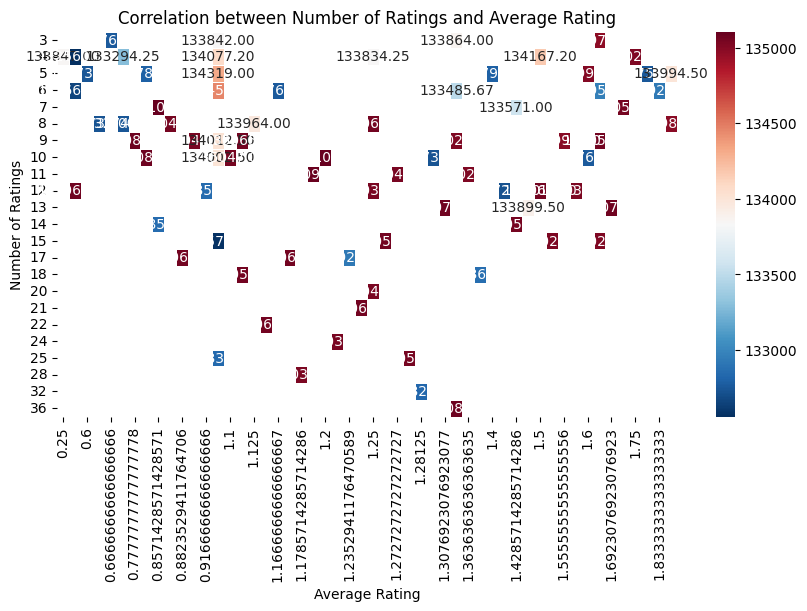

In [6]:
# Group the data by placeID and calculate the number of ratings and average rating
item_ratings = ratings.groupby('placeID').agg({'userID': 'count', 'rating': 'mean'}).reset_index()
item_ratings.columns = ['placeID', 'num_ratings', 'avg_rating']

# Create a pivot table showing the correlation between the number of ratings and average rating
pivot = item_ratings.pivot_table(index='num_ratings', columns='avg_rating', values='placeID')

# Create a heatmap of the pivot table
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='RdBu_r', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation between Number of Ratings and Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.show()


The heatmap illustrates the relationship between the quantity of ratings and the average ratings for various restaurants. Darker shades indicate stronger correlations.

* Restaurants receiving more ratings generally tend to have higher average ratings. This hints that people are more inclined to rate places they appreciate.
* There's considerable variability in how ratings and quantity of ratings correlate. This implies that factors like restaurant category, pricing, or location also impact user ratings.
* Certain restaurants amass many ratings but maintain lower average ratings. This suggests popularity without necessarily high satisfaction.
* On the flip side, some restaurants with fewer ratings exhibit higher average ratings. This implies they might be lesser-known but hold favor among the limited users who have rated them.

# Problem 2

**User-based Filtering**

1.   Complete the calc_corr() function to find the correlation between restaurants.
2.   Recommend 15 restaurants that the customers of the restaurant `La Posada del Virrey` are expected to like.

Hints:


1.   Perform Matrix Factorization using `pivot_table` function (Note: Matrix factorization algorithms work by decomposing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices).
2.   Complete the defined calc_corr() function using the inbuilt `corr_with` function.
3. Using the calc_corr recommend the top-15 restaurants.





In [7]:
# Matrix Factorization (pivot_table)
# WRITE YOUR CODE:
itemratings = ratings.pivot_table(index='userID', columns='name', values='rating')
itemratings.head()

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rincón de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1005,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def calc_corr(df_rest, rest_name):

    similar_to_rest = df_rest.corrwith(df_rest[rest_name])
    corr_rest = pd.DataFrame(similar_to_rest, columns=['Correlation'])
    corr_rest.dropna(inplace=True)
    corr_rest = corr_rest.sort_values(by='Correlation', ascending=False)
    return corr_rest

In [9]:
rest_name = 'La Posada del Virrey'
res = calc_corr(itemratings, rest_name)
recommended_restaurants = res.head(15)
print("Top 15 recommended restaurants for customers of 'La Posada del Virrey':")
print(recommended_restaurants)

Top 15 recommended restaurants for customers of 'La Posada del Virrey':
                               Correlation
name                                      
crudalia                          1.000000
La Virreina                       1.000000
Restaurante Bar Fu-hao            1.000000
la Cantina                        1.000000
La Posada del Virrey              1.000000
VIPS                              1.000000
Restaurant la Chalita             1.000000
Restaurant Oriental Express       0.875000
los Toneles                       0.866025
Restaurante Versalles             0.866025
Cafe Chaires                      0.866025
Restaurante El Cielo Potosino     0.858984
la parroquia                      0.852803
Gorditas Doa Gloria               0.848838
Luna Cafe                         0.818182


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


# Problem 3

**Item-based filtering**

1.  Calculate the cosine similarity between restaurants to measure their similarity.
2.  Use item-based filtering to recommend upto 5 restaurants to users based on their previous ratings.

HINTS:
*   From the above created pivot_table make use of `cosine similarity` function available in the sklearn library and measure the similarity.

*   Create a function `recommend_restaurants` that takes a user ID and recommends restaurants based on their past ratings and the similarity between restaurants.



In [10]:
user_restaurant_ratings = itemratings.fillna(0)
user_restaurant_ratings.head()

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rincón de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
restaurant_similarity = cosine_similarity(user_restaurant_ratings.T)

restaurant_similarity_df = pd.DataFrame(restaurant_similarity, index=user_restaurant_ratings.columns, columns=user_restaurant_ratings.columns)

def recommend_restaurants(userID, num_recommendations=5):
    user_ratings = user_restaurant_ratings.loc[userID].values.reshape(1, -1)
    cosine_similarities = cosine_similarity(user_ratings, restaurant_similarity_df).flatten()
    similar_restaurants = pd.Series(cosine_similarities, index=user_restaurant_ratings.columns)
    recommended_restaurants = similar_restaurants.sort_values(ascending=False).head(num_recommendations)
    return recommended_restaurants

In [12]:
user_id = 1093
recommended_restaurants = recommend_restaurants(user_id)
print("Top 5 recommended restaurants for user", user_id, ":")
print(recommended_restaurants)

Top 5 recommended restaurants for user 1093 :
name
Restaurant Bar Coty y Pablo     0.894073
Restaurant Familiar El Chino    0.890498
Giovannis                       0.890030
Kiku Cuernavaca                 0.886429
Log Yin                         0.781480
dtype: float64


# Problem 4

a. For the above restaurant recommendation system, how would you design a hybrid approach that leverages both user-based and item-based collaborative filtering?

b. Do you see any potential challenges or trade-offs associated with implementing such a hybrid recommendation system for restaurants?

More information on [hybrid recommendation systems](https://medium.com/grabngoinfo/hybrid-recommendation-system-using-user-based-and-item-based-collaborative-filtering-c5e8283cd2dc#:~:text=In%20a%20switching%20hybrid%20method,one%20approach%20over%20the%20other.)

## a.
## *Create suggestions:*

User-centric: Identify similar users based on their ratings, then suggest restaurants highly rated by those similar users.
Restaurant-centric: Find akin restaurants based on ratings from all users, then recommend similar restaurants to those highly rated by the user.
Adjust recommendation relevance:

Employ a technique to assign weight to recommendations from each method, potentially favoring the one with a stronger historical performance.



## b.
* Complexity: Hybrid recommendation systems pose a greater implementation challenge as they require calculating similarity matrices for both users and items, followed by merging recommendations from both methods in a coherent manner.

* Scalability: They also tend to demand more computational resources compared to singular user-based or item-based collaborative filtering, given the increased data processing needed to generate recommendations.

* Interpretability: Hybrid systems can be more intricate to decipher than individual user-based or item-based collaborative filtering methods since they amalgamate recommendations from multiple origins.